# **IEOR 4404  Simulation (Spring 2020)**

**Homework 3 [Total points: 60]**


**Due 11:59 PM, Feb 29**

Homework 3 consists of application-oriented exercises focusing on

* Monte-Carlo Integration
* Sampling from a discrete distribution using the inverse transform method

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)

In [1]:
#Your Name: Limeng Lu
#Your UNI: ll3359

In [2]:
#This imports all the packages you need for the homework (you might not use some of them)
#Please run this first
import numpy as np

import scipy.special as spsp

import scipy.stats as spst

import matplotlib.pyplot as plt

%matplotlib inline


#Exercise 1 [20 Points]

**Setting**

Let's focus on the following integration:

$\int_2^5 x^2 \; dx $

##Q1. [6 Points]

In the lecture, we converted the integration problem to 

$\int_0^1 h(y) \; dy $.

We first draw random samples of $y$ and then plugged the $y$ values into $h(y)$ function. For this exercise, let's denote the h(y) samples we got using $h^{y_1}, h^{y_2}, \dots, h^{y_n}$.


* Collect samples $h^{y_1}, h^{y_2}, \dots, h^{y_{10000}}$ 
* Plot the sampling distribution of these 10000 samples of $h(y)$ we got.

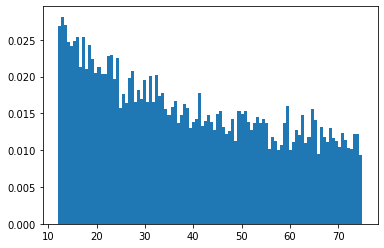

In [3]:
y=np.random.rand(10000)
a=2
b=5
z=a+(b-a)*y
hy=z**2*(b-a)


plt.hist(hy,density=True,bins=100)
plt.show()

##Q2. [6 Points]

It can be proved that these samples are drawn from the following distribution:

$$f(h^y)=\begin{cases} \frac{\sqrt{3}}{18\sqrt{h^y}}, \text{if} \; 12 \leq h^y \leq 75\\0, \text{otherwise}\end{cases}$$

$E(h^y)=39$ and $Var(h^y)=334.8$

[You can take the result as given. You will understand where this result is front in the later part of the course]

* Plot the sample distribution using the 10000 samples generated in Q1. In the same plot, give the theoretical distribution.
* Compare the sample mean and the sample variance of the 10000 samples we collected in the last step with the theoretical values.



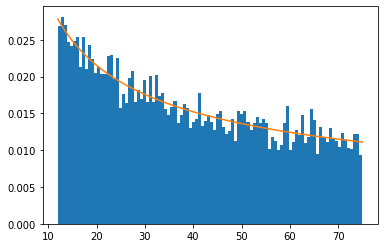

In [4]:
h=np.linspace(12,75,1000)
pdf=3**0.5/18/h**0.5
plt.hist(hy,density=True,bins=100)
plt.plot(h,pdf)
plt.show()

In [5]:
print(np.mean(hy))
print(np.var(hy,ddof=1))


38.91543887920745
335.4604874666455


##Q3. [8 Points]

Generate the Monte-carlo integration results 1000 times. 

* Plot the distribution of these 1000 samples. 
* In the same plot, show the theoretical distribution based on the central limit theorem.



In [6]:
def MC_int():
    y=np.random.rand(10000)
    a=2
    b=5
    z=a+(b-a)*y
    hy=z**2*(b-a)
    return np.mean(hy)

results=[MC_int() for i in range(1000)]

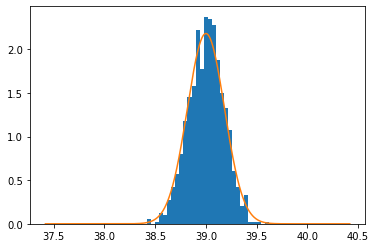

In [7]:
plt.hist(results,density=True,bins=30)
x=np.linspace(np.min(results)-1,np.min(results)+2,1000)
pdf=spst.norm.pdf(x, 39,334.8**0.5/10000**0.5)
plt.plot(x,pdf)

#Exercise 2 [12 Points]

**Setting**

In the class, we discussed one method to sample from a Binomial distribution, in which we directly use the inverse transform method to draw samples following 

$PMF(k)=\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}$

The search order follows $k=0$, $k=1$, $k=2$, $\dots$ 

We can improve the efficiency of sampling from a Binomial distribution $(n,p)$ based on the probability of each outcome appearing.

##Q1. [8 Points]

* Based on `np.sort()` and `np.argsort()`, implement a search algorithm that allows the search to start from outcome with the highest probability and ends at the outcome with the lowest probability. When generating $N$ samples, the sorting should only happen once. 

* Plot the distribution of the samples with $n=10$ and $p=0.4$, and $N=10000$. In the sample plot, show the corresponding theoretical distribution.


<BarContainer object of 11 artists>

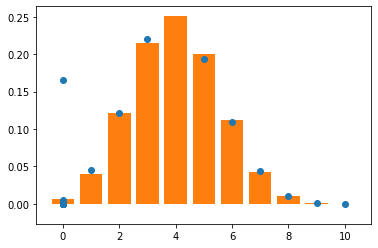

In [8]:
def sample(n, p, N): 
    outcome=np.arange(n+1)
    PMF=spsp.factorial(n)/spsp.factorial(outcome)/spsp.factorial(n-outcome)
    PMF*=p**outcome*(1-p)**(n-outcome)
    outcome_sorted=outcome[np.argsort(-PMF)]
    PMF_sorted=-np.sort(-PMF)
    CDF_sorted=np.cumsum(PMF_sorted)
    samples=np.empty(N)
    for i in range(N):
        u=np.random.rand()
        j=0
        while u>=CDF_sorted[j]:
            j+=1
            samples[i]=outcome_sorted[j]
    return samples
samples=sample(n=10, p=0.4, N=10000)

outcomes, counts=np.unique(samples,return_counts=True)
plt.scatter(outcomes,counts/np.sum(counts),zorder=2)
n=10
p=0.4
x=np.arange(n+1)

pmf=spsp.factorial(n)/spsp.factorial(x)/spsp.factorial(n-x)
pmf=pmf*p**x*(1-p)**(n-x)
plt.bar(x,pmf)


## Q2. [4 Points]

* Compute the expected number of searches if we search following $k=0$, $k=1$, $\dots$, $k=n$.
* Compute the expected number of searches if we search based on the probability of outcomes (the algorithm implemented in Q1).

In [9]:
outcome=np.arange(n+1)
PMF=spsp.factorial(n)/spsp.factorial(outcome)/spsp.factorial(n-outcome)
PMF*=p**outcome*(1-p)**(n-outcome)
outcome_sorted=outcome[np.argsort(-PMF)]
PMF_sorted=-np.sort(-PMF)

#search upward
searches=np.arange(1,n+2)
print(np.sum(PMF*searches))

#search based on probability of outcomes
print(np.sum(PMF_sorted*searches))

4.999999999999999
3.0171075584


#Exercise 3 [16 Points]
**Setting**


Since Binomial distribution is the sum of N Bernoulli trials, we can use a different method to sample from a Binomial distribution

**Step 1**:  Simulate one Bernoulli trial based on the inverse transform method. This Bernoulli trial can be 0 with $1-p$ probability and 1 with $p$ probability.

**Step 2**:  This the Bernoulli trial will be simulated $n$ times.

**Step 3**:  The outcome will be the sum of the samples from these $n$ Bernoulli trials.


##Q1. [8 Points]

* Construct a function that implements this algorithm. This function should generate one sample without using loops for given $n$ and $p$.
* Use this function to generate 10000 samples assuming that $n=10$ and $p=0.4$. 
* Compute the sample mean and sample variance.

<BarContainer object of 11 artists>

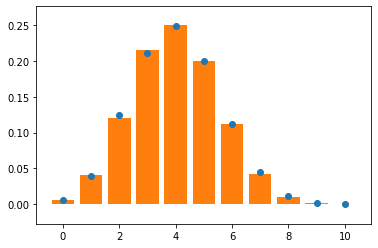

In [10]:
def binom(n,p):
    return np.sum(np.random.rand(n)<p)
n=10
p=0.4
samples=[binom(n,p) for i in range(10000)]
samples=np.array(samples)
outcomes, counts=np.unique(samples,return_counts=True)
plt.scatter(outcomes,counts/np.sum(counts),zorder=2)
x=np.arange(n+1)
pmf=spsp.factorial(n)/spsp.factorial(x)/spsp.factorial(n-x)
pmf=pmf*p**x*(1-p)**(n-x)
plt.bar(x,pmf)

## Q2. [8 Points]

We are usually interested in using sample mean as an estimation of the theoretical mean. 

* Construct a function that will generate N samples from a Binomial distribution and return the sample mean. This function should call the function you constructed in Q1.

* Call the function with $N=1, N=2, N=3, N=2000$. Store the sample mean you got in each case. 
* Plot the relationship between the sample mean and corresponding N using a line plot. Also, add a horizontal line with $y$ with the theoretical mean. (check [plt.axhline()](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.axhline.html))
* Describe what you found from this plot.

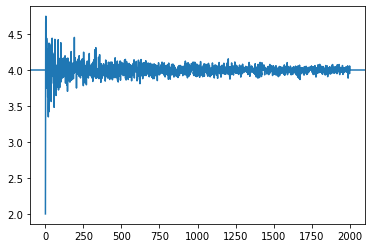

In [11]:
def sampling(N):
    samples=[binom(n=10,p=0.4) for i in range(N)]
    samples=np.array(samples)
    return np.mean(samples)

returns=[sampling(i) for i in range(1,2001)]
plt.plot(np.arange(1,2001), np.array(returns))
plt.axhline(y=4)
#the sample means get closer to the theoretical mean as the number of samples increases.

#Exercise 4 [12 Points]
**Setting**

The Yule-Simon distribution (or Yule distribution) is a highly skewed discrete probability distribution. It is commonly used in analyzing the frequency data. 

The PMF of this distribution follows

$P(k)=\rho \frac{\Gamma(\rho+1)\Gamma(k)}{\Gamma(x+\rho+1)} , \text{where } \; k=1, 2, \dots, \infty $

In the PMF function, $\Gamma(z)$ is a function called gamma function. $\Gamma(z)$ can be computed using scipy.special.gamma(z).

For this distribution, $E(k)=\frac{\rho}{\rho-1}$ and $Var(k)=\frac{\rho^2}{(\rho-1)^2(\rho-2)}$, if $\rho>1$.



##Q1. [12 Points]

Assume that $\rho=3$. 



* Generate 10000 samples from this distribution based upward search. Start the search from $x=1$. When updating the PMF, using the iterative approach (based on $PMF(x)/PMF(x-1)$). Notice that $\Gamma(z)=(z-1)!$ when $z$ is an integer.

* Visualize the sample distribution and the theoretical distribution.  

* Based on the samples generated, compute the sample mean and sample variance. Compare the value with the theoretical mean and theoretical samples.

* For this algorithm, what is the expected number of searches?

<BarContainer object of 121 artists>

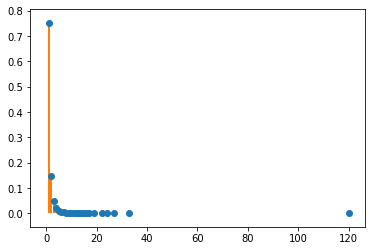

In [12]:
def onesample():
    x=1
    rho=3
    PMF=rho*spsp.factorial(rho)*spsp.factorial(x-1)/spsp.factorial(x+rho)
    CDF=PMF
    u=np.random.rand()
    while u>=CDF:
        x=x+1
        PMF=PMF*(x-1)/(x+rho)
        CDF=CDF+PMF
    return x
samples=[onesample() for i in range(10000)]
samples=np.array(samples)
rho=3
outcomes, counts=np.unique(samples,return_counts=True)
plt.scatter(outcomes,counts/np.sum(counts),zorder=2)
x=np.arange(np.max(outcomes)+1)
pmf=rho*spsp.factorial(rho)*spsp.factorial(x-1)/spsp.factorial(x+rho)
plt.bar(x,pmf)



In [13]:
print("samples:")
print(np.mean(samples),np.var(samples,ddof=1))

print("theoretical:")
print(rho/(rho-1),rho**2/(rho-1)**1/(rho-1))

#the sample mean is very close to the theoretical mean.
#the sample var has a large variation from the mean

samples:
1.4919 3.10684507450745
theoretical:
1.5 2.25
